In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2010-01-01'
end = '2020-12-31'

In [12]:
df = data.DataReader('GOOGL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,313.013000,310.300293,312.687683,310.300293,2437160.0,310.300293
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908488.0,313.688690
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003391.0,312.307312
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949443.0,304.434448
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815771.0,297.347351


In [13]:
 #Reseting Index as I don't want Date as Index Column
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,313.013000,310.300293,312.687683,310.300293,2437160.0,310.300293
1,2010-01-04,315.070068,312.432434,313.788788,313.688690,3908488.0,313.688690
2,2010-01-05,314.234222,311.081085,313.903900,312.307312,6003391.0,312.307312
3,2010-01-06,313.243256,303.483490,313.243256,304.434448,7949443.0,304.434448
4,2010-01-07,305.305298,296.621613,305.005005,297.347351,12815771.0,297.347351


>Dropping Date and Adjusted Close column as they will not play significant role
>Adj Close can play very big role for analysing the past performance for particular stock but it is not helpful for
>Predicting the price

In [14]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,313.013000,310.300293,312.687683,310.300293,2437160.0
1,315.070068,312.432434,313.788788,313.688690,3908488.0
2,314.234222,311.081085,313.903900,312.307312,6003391.0
3,313.243256,303.483490,313.243256,304.434448,7949443.0
4,305.305298,296.621613,305.005005,297.347351,12815771.0


>Moving average is an indicator that shows the average value of a stock's price over a period (i.e. 10 days, 50 days, 200 days, etc) and is usually plotted along with the closing price.
>> So we will be ploting Moving avergae for 100 and 200 days with the closing price of stock. Also, we can further 
use Open Price of stock for the same analysis 

In [15]:
#Moving Average For 100 Days
movingAvg100 = df.Close.rolling(100).mean()
#Moving Average For 200 Days
movingAvg200 = df.Close.rolling(200).mean()

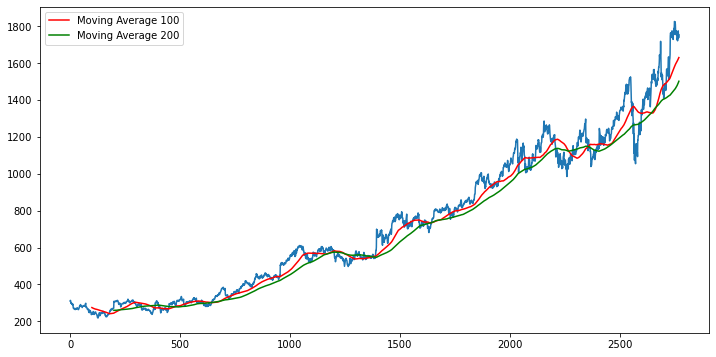

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(movingAvg100, 'r', label = "Moving Average 100")
plt.plot(movingAvg200, 'g', label = "Moving Average 200")
plt.legend()

In [18]:
#Spliting data into training and testing 
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])
print(data_train.shape)
print(data_test.shape)

(1938, 1)
(832, 1)


In [19]:
#Scaling Down the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_train_array = scaler.fit_transform(data_train)

In [21]:
# Staring 200 Days will be my X_Train and 201th Day will be my Y_Train and Futher 201th Value will be includes into 
# Training and Next Day will be my Y_Train
X_Train = []
Y_Train = []

for i in range(200, data_train_array.shape[0]):
    X_Train.append(data_train_array[i - 200: i])
    Y_Train.append(data_train_array[i, 0])

In [22]:
X_Train, Y_Train = np.array(X_Train), np.array(Y_Train)

In [25]:
#LSTM Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_Train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 200, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [29]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_Train, Y_Train, epochs = 100)

Epoch 1/100
55/55 [==============================] - 61s 557ms/step - loss: 0.0957
Epoch 2/100
55/55 [==============================] - 28s 518ms/step - loss: 0.0082
Epoch 3/100
55/55 [==============================] - 30s 542ms/step - loss: 0.0077
Epoch 4/100
55/55 [==============================] - 30s 545ms/step - loss: 0.0066
Epoch 5/100
55/55 [==============================] - 27s 495ms/step - loss: 0.0064
Epoch 6/100
55/55 [==============================] - 29s 523ms/step - loss: 0.0076
Epoch 7/100
55/55 [==============================] - 28s 504ms/step - loss: 0.0061
Epoch 8/100
55/55 [==============================] - 30s 540ms/step - loss: 0.0067
Epoch 9/100
55/55 [==============================] - 30s 542ms/step - loss: 0.0056
Epoch 10/100
55/55 [==============================] - 29s 525ms/step - loss: 0.0052
Epoch 11/100
55/55 [==============================] - 28s 517ms/step - loss: 0.0050
Epoch 12/100
55/55 [==============================] - 30s 543ms/step - loss: 0.0053
E

55/55 [==============================] - 25s 458ms/step - loss: 0.0019
Epoch 99/100
55/55 [==============================] - 26s 466ms/step - loss: 0.0022
Epoch 100/100
55/55 [==============================] - 25s 461ms/step - loss: 0.0020


In [31]:
model.save('Stockify_LSTM_Model.h5')

In [32]:
#Testing the model I need Past 200 Days data
past_200_days = data_train.tail(100)
final_df = past_200_days.append(data_test, ignore_index=True)
input_data = scaler.fit_transform(final_df)
print(input_data.shape)

(932, 1)


In [37]:
X_Test = []
Y_Test = []

for i in range(200, input_data.shape[0]):
    X_Test.append(input_data[i-200:i])
    Y_Test.append(input_data[i, 0])

X_Test, Y_Test = np.array(X_Test), np.array(Y_Test)

print(X_Test.shape)
print(Y_Test.shape)

(732, 200, 1)
(732,)


In [38]:
#Prediction
Y_pred = model.predict(X_Test)

In [39]:
scaler = scaler.scale_

In [40]:
scaler_factor = 1/scaler[0]
Y_pred = Y_pred * scaler_factor
Y_Test = Y_Test * scaler_factor

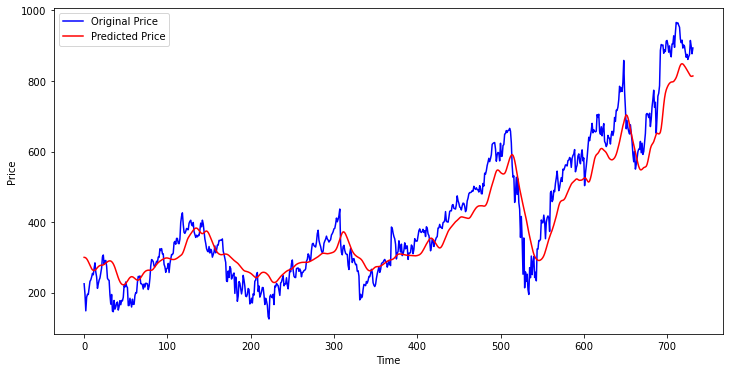

In [41]:
plt.figure(figsize = (12,6))
plt.plot(Y_Test, 'b', label = 'Original Price')
plt.plot(Y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()